In [0]:
import os

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img

from efficientnet.tfkeras import EfficientNetB3
from efficientnet.tfkeras import preprocess_input

In [0]:
#image visualization
def show_image(path):
    img = Image.open(path)
    img_arr = np.array(img)
    plt.figure(figsize=(5,5))
    plt.imshow(np.transpose(img_arr, (0, 1, 2)))

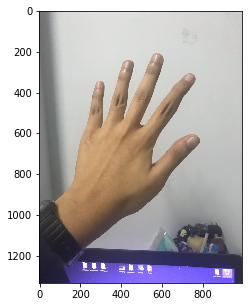

In [5]:
show_image('/test_images/paper_1.jpg')

In [0]:
def create_model(weight_path):
      base_model = EfficientNetB3(weights='imagenet', include_top=False)
      x = base_model.output
      x = layers.GlobalAveragePooling2D()(x)
      x = layers.Dense(256, activation='relu')(x)
      x = layers.Dropout(0.25)(x)
      predictions = layers.Dense(3, activation='softmax')(x)
      
      model = Model(inputs=base_model.input, outputs=predictions)
      model.load_weights(weight_path)

      return model

In [7]:
model = create_model('/models/RPS_efficientnet_10.h5')

Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
#set of images that you want to predict
#all of these images is a new image that took by myself
img_paths = ['/test_images/rock_1.jpg',
             '/test_images/rock_2.jpg',
             '/test_images/rock_3.jpg',
             '/test_images/paper_1.jpg',
             '/test_images/paper_2.jpg',
             '/test_images/paper_3.jpg',
             '/test_images/scissors_1.jpg',
             '/test_images/scissors_2.jpg',
             '/test_images/scissors_3.jpg']

In [0]:
def batch_prediction(img_path,image_size =300):
    labels = ["paper","rock","scissors"]

    for i in img_path:
        images = load_img(i)

        #preparing image
        img = np.array(images.resize((image_size,image_size)))
        img = preprocess_input(img)
        img = img /255
        img = img.reshape(1,image_size,image_size,3)

        probability = model.predict(img)
        result = labels[probability.argmax()]

        print(probability)
        print(result)

        plt.imshow(images)
        plt.show()

[[4.5228927e-04 9.9810588e-01 1.4418081e-03]]
rock


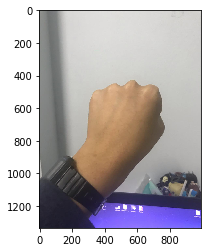

[[3.5288424e-04 9.9941647e-01 2.3070545e-04]]
rock


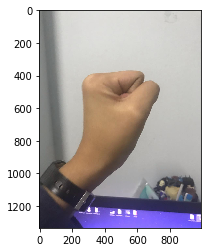

[[4.8546754e-05 9.9935180e-01 5.9960218e-04]]
rock


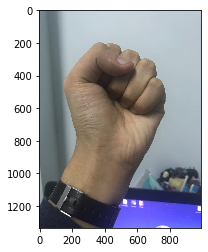

[[9.9998021e-01 2.5942454e-06 1.7172993e-05]]
paper


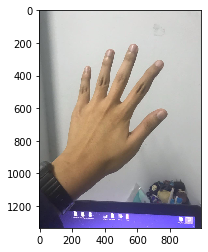

[[9.9993443e-01 1.2767680e-05 5.2794592e-05]]
paper


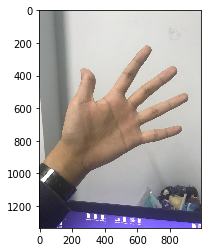

[[9.9780816e-01 2.1065769e-03 8.5226828e-05]]
paper


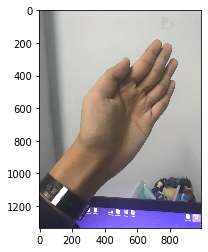

[[1.00591315e-05 1.59252322e-05 9.99974012e-01]]
scissors


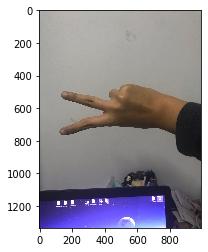

[[1.8424662e-07 2.5477696e-08 9.9999976e-01]]
scissors


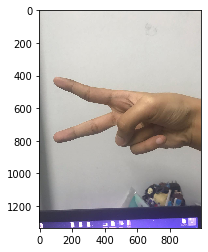

[[4.5793604e-07 1.1357662e-07 9.9999940e-01]]
scissors


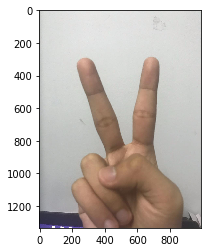

In [10]:
batch_prediction(img_paths)